In [1]:
pip install fuzzy-c-means

     |████████████████████████████████| 2.6 MB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 16.9 MB 2.4 MB/s eta 0:00:01    |██████▎                         | 3.3 MB 473 kB/s eta 0:00:29
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2
Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [16]:
n_samples = 3000

X = np.concatenate((
    np.random.normal((-2, -1), size=(n_samples, 2)),
    np.random.normal((-1, 2), size=(n_samples, 2))
))

In [15]:
np.shape(X)

(6000, 2)

In [19]:
fcm = FCM(n_clusters=3)
fcm.fit(X)

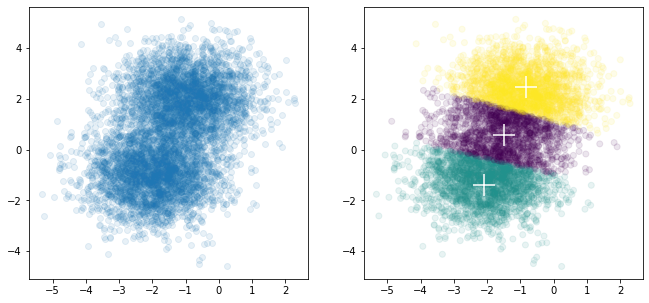

In [20]:
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)

f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X[:,0], X[:,1], alpha=.1)
axes[1].scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.1)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='w')
plt.savefig('hasil.jpg')
plt.show()